In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
df = pd.read_csv('/content/data_for_model.csv')
print(df.head())

csv_file_path = '/content/data_for_model.csv'
df = pd.read_csv('/content/data_for_model.csv')
print(df.head())

    flat_type  flat_price       location1  buildupArea_sqft  \
0  2 BHK Flat        0.95  Mira Road East              1060   
1  1 BHK Flat        0.93   Borivali East               525   
2  2 BHK Flat        1.48    Bhandup West              1065   
3  3 BHK Flat        2.50    Bhandup West              1150   
4  1 BHK Flat        1.10     Wadala East               480   

       age_of_property      furnishing  bedrooms  bathrooms  balcony parking  
0  recent construction  Semi Furnished         2          2        0     yes  
1     mid age property  Semi Furnished         1          2        0      no  
2     new construction  Semi Furnished         2          2        1     yes  
3  recent construction  Semi Furnished         3          2        0     yes  
4     new construction     Unfurnished         1          2        0     yes  
    flat_type  flat_price       location1  buildupArea_sqft  \
0  2 BHK Flat        0.95  Mira Road East              1060   
1  1 BHK Flat        

In [ ]:
print("Dimensions of the DataFrame (rows, columns):")
print(df.shape)

df = df.dropna()
print("\nDataFrame after dropping rows with missing values:")
print(df.head())

df = df.drop_duplicates()

print("Cleaned DataFrame:")
print(df.head())

Dimensions of the DataFrame (rows, columns):
(7483, 10)

DataFrame after dropping rows with missing values:
    flat_type  flat_price       location1  buildupArea_sqft  \
0  2 BHK Flat        0.95  Mira Road East              1060   
1  1 BHK Flat        0.93   Borivali East               525   
2  2 BHK Flat        1.48    Bhandup West              1065   
3  3 BHK Flat        2.50    Bhandup West              1150   
4  1 BHK Flat        1.10     Wadala East               480   

       age_of_property      furnishing  bedrooms  bathrooms  balcony parking  
0  recent construction  Semi Furnished         2          2        0     yes  
1     mid age property  Semi Furnished         1          2        0      no  
2     new construction  Semi Furnished         2          2        1     yes  
3  recent construction  Semi Furnished         3          2        0     yes  
4     new construction     Unfurnished         1          2        0     yes  
Cleaned DataFrame:
    flat_type  flat_

In [ ]:
df.to_csv('/content/cleaned_data_for_model.csv', index=False)
print("Dimensions of the DataFrame (rows, columns):")
print(df.shape)

print("\nData types of each column:")
print(df.dtypes)

string_columns = df.select_dtypes(include=['object']).columns
print("\nColumns with string (object) data types:")
print(string_columns)

Dimensions of the DataFrame (rows, columns):
(7373, 10)

Data types of each column:
flat_type            object
flat_price          float64
location1            object
buildupArea_sqft      int64
age_of_property      object
furnishing           object
bedrooms              int64
bathrooms             int64
balcony               int64
parking              object
dtype: object

Columns with string (object) data types:
Index(['flat_type', 'location1', 'age_of_property', 'furnishing', 'parking'], dtype='object')


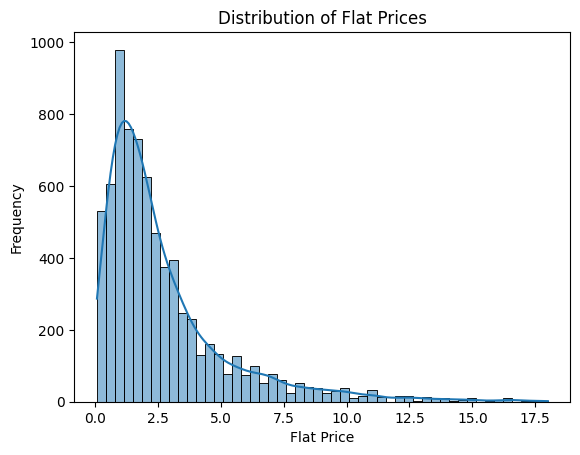

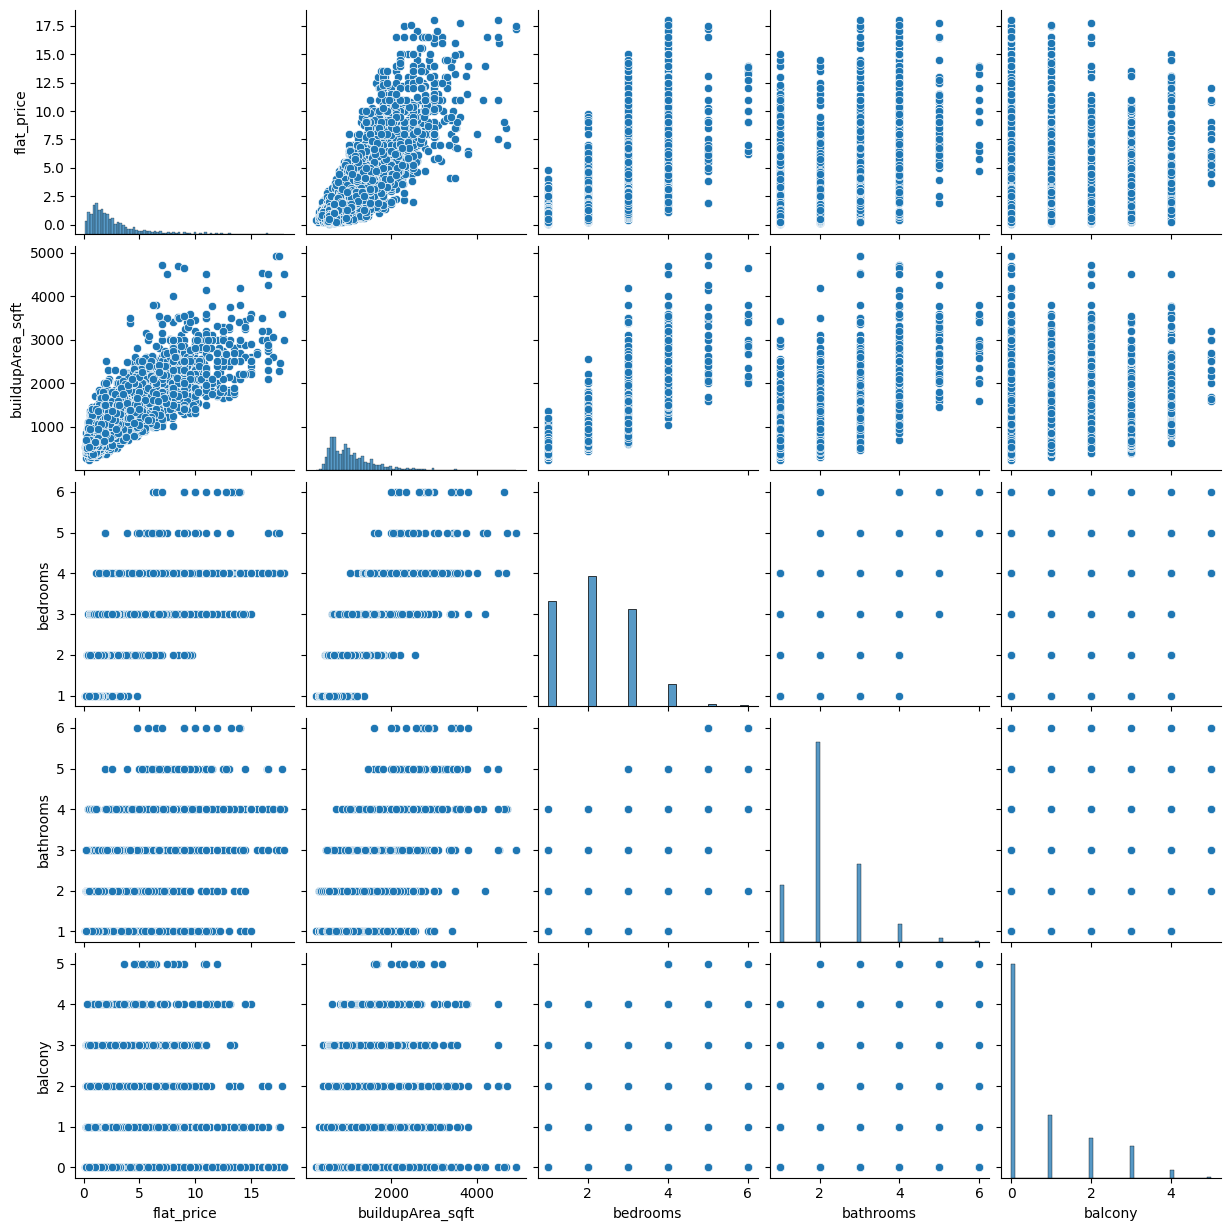

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['flat_price'], bins=50, kde=True)
plt.title('Distribution of Flat Prices')
plt.xlabel('Flat Price')
plt.ylabel('Frequency')
plt.show()

sns.pairplot(df[['flat_price', 'buildupArea_sqft', 'bedrooms', 'bathrooms', 'balcony']])
plt.show()

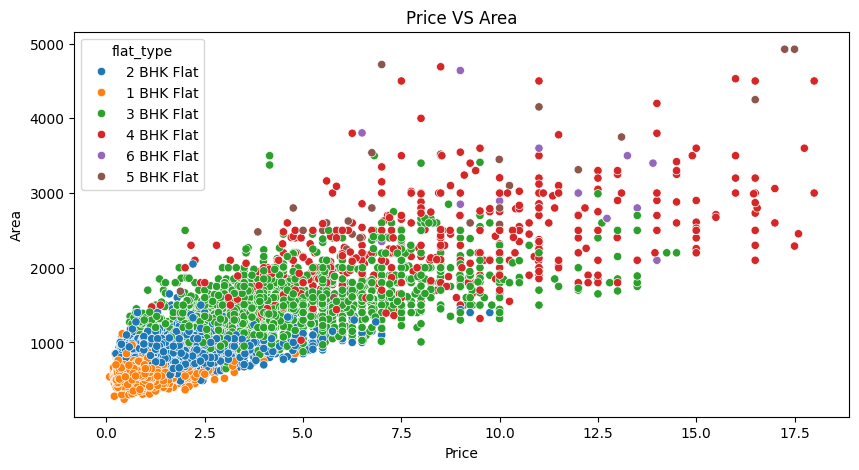

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(df,x = df['flat_price'], y = df['buildupArea_sqft'],hue = df['flat_type'])
plt.title("Price VS Area")
plt.xlabel("Price")
plt.ylabel("Area")
plt.show()

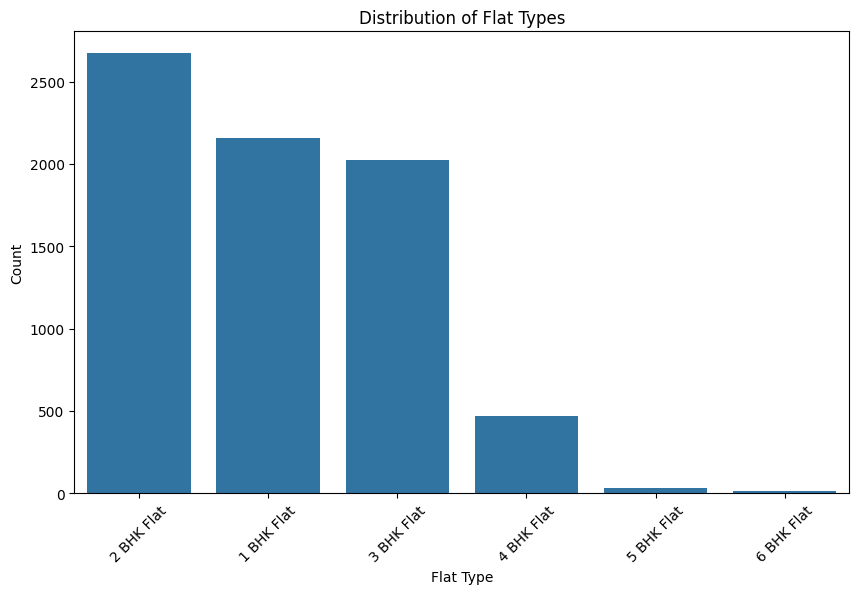

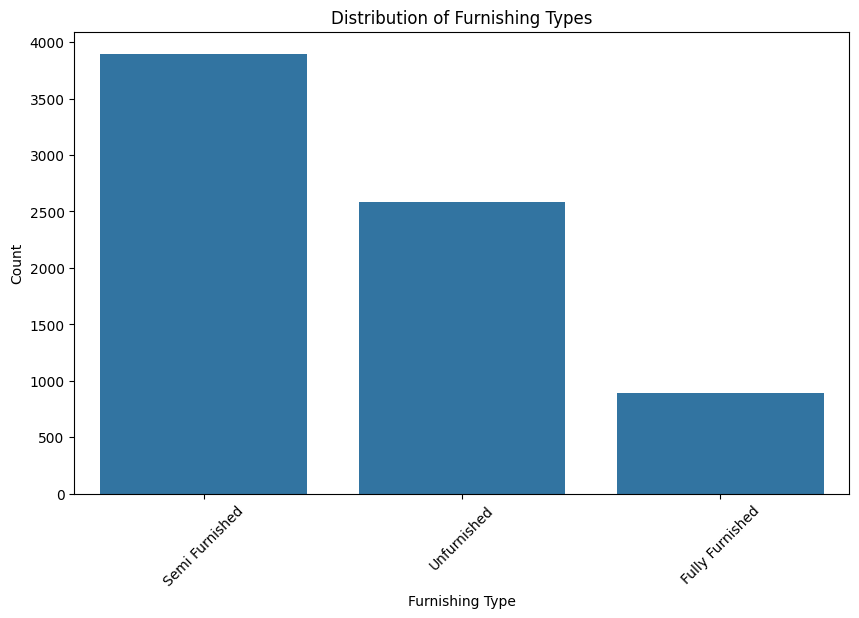

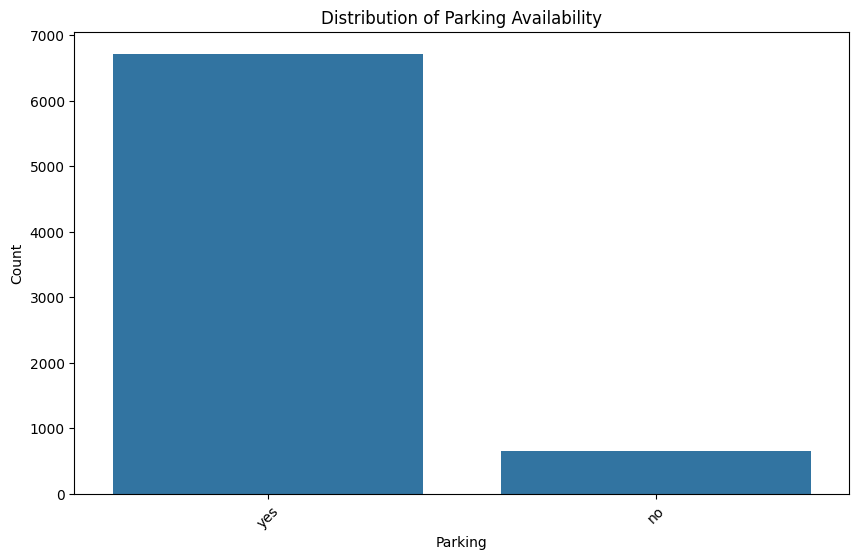

In [ ]:
# Countplot for flat type
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='flat_type', order=df['flat_type'].value_counts().index)
plt.title('Distribution of Flat Types')
plt.xlabel('Flat Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Countplot for parking
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='parking', order=df['parking'].value_counts().index)
plt.title('Distribution of Parking Availability')
plt.xlabel('Parking')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


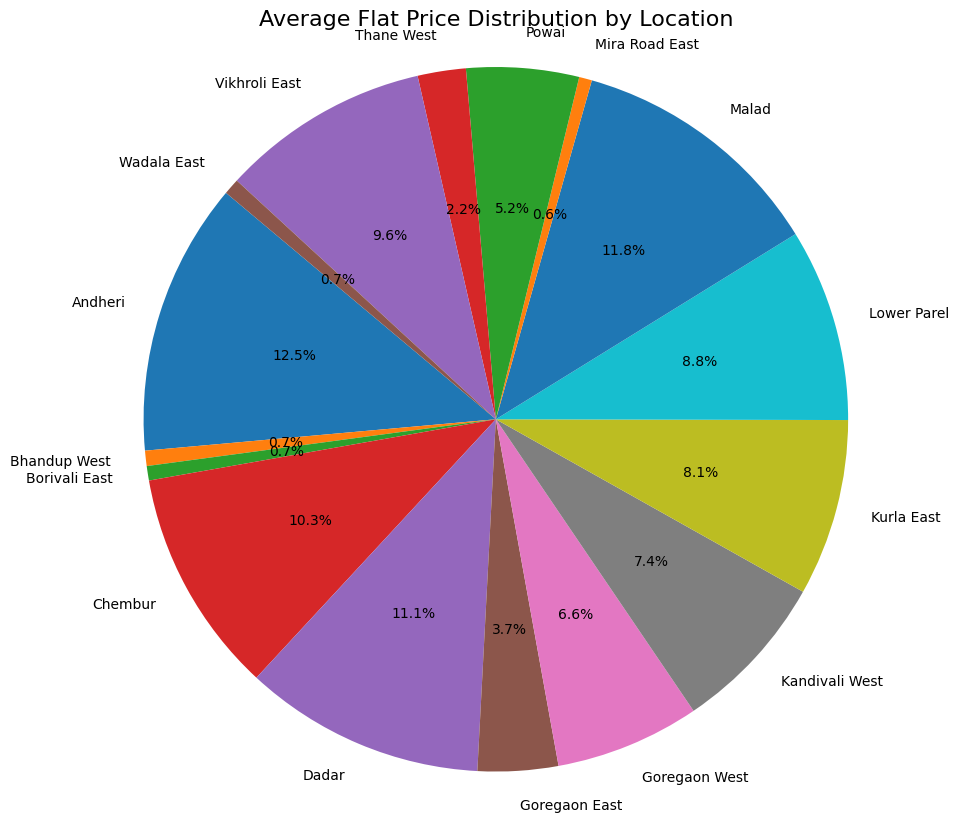

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace with your actual DataFrame)
data = {
    'flat_price': [0.80, 0.90, 0.95, 1, 3, 5, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17], # Removed subtractions to avoid negative values. If these represent ranges, you'll need to handle them differently.
    'location1': ['Mira Road East', 'Borivali East', 'Bhandup West', 'Wadala East',
                  'Thane West', 'Goregaon East', 'Powai', 'Goregaon West',
                  'Kandivali West', 'Kurla East', 'Lower Parel', 'Vikhroli East',
                  'Chembur', 'Dadar', 'Malad', 'Andheri']
}
df = pd.DataFrame(data)

# Group by location and calculate average flat price
location_price_summary = df.groupby('location1')['flat_price'].mean().reset_index()

# Create the pie chart
plt.figure(figsize=(10, 10))
plt.pie(location_price_summary['flat_price'],
        labels=location_price_summary['location1'],
        autopct='%1.1f%%',  # Show percentage
        startangle=140)  # Start the pie chart at a specific angle

plt.title('Average Flat Price Distribution by Location', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


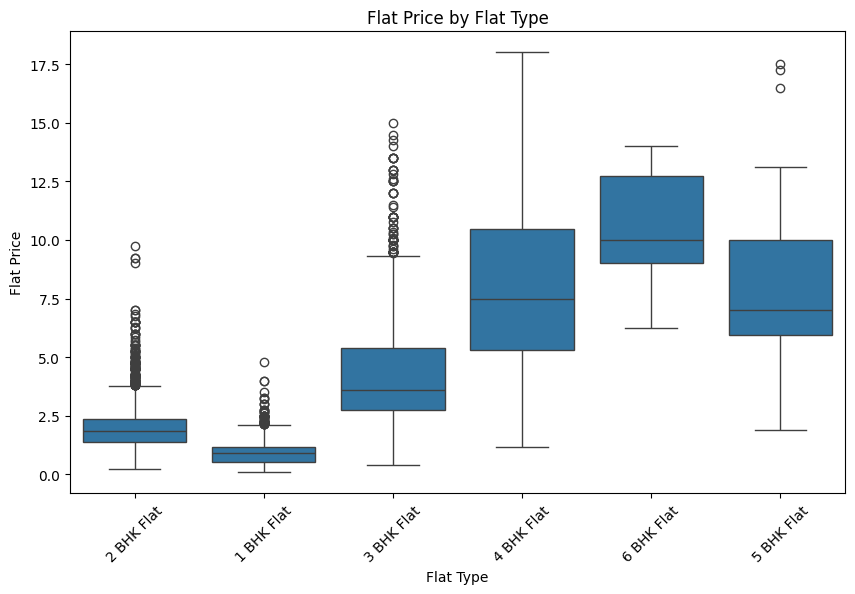

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


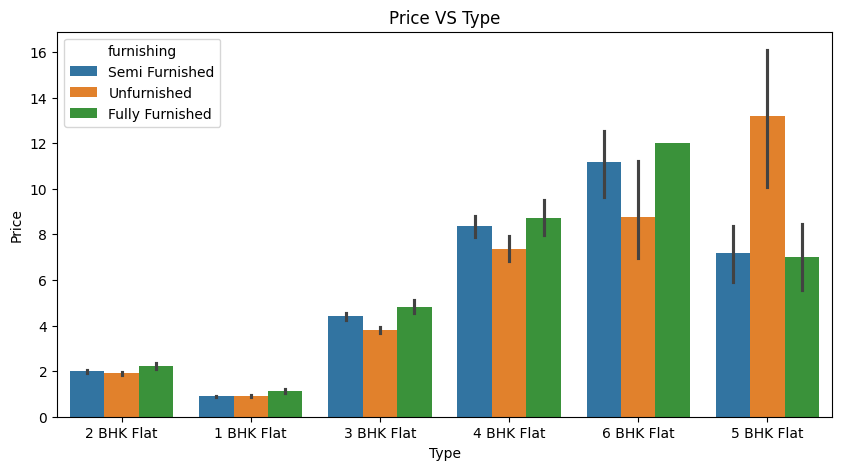

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='flat_type', y='flat_price')
plt.title('Flat Price by Flat Type')
plt.xlabel('Flat Type')
plt.ylabel('Flat Price')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(df,x = df['flat_type'], y = df['flat_price'],hue = df['furnishing'])
plt.title("Price VS Type")
plt.xlabel("Type")
plt.ylabel("Price")
plt.show()


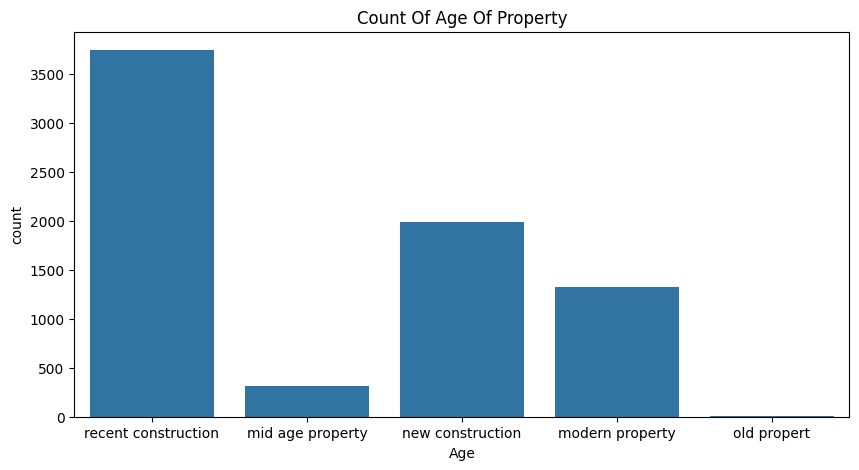

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(df,x = df['age_of_property'])
plt.title("Count Of Age Of Property")
plt.xlabel("Age")
plt.show()

First 5 rows of the dataset:
    flat_type  flat_price       location1  buildupArea_sqft  \
0  2 BHK Flat        0.95  Mira Road East              1060   
1  1 BHK Flat        0.93   Borivali East               525   
2  2 BHK Flat        1.48    Bhandup West              1065   
3  3 BHK Flat        2.50    Bhandup West              1150   
4  1 BHK Flat        1.10     Wadala East               480   

       age_of_property      furnishing  bedrooms  bathrooms  balcony parking  
0  recent construction  Semi Furnished         2          2        0     yes  
1     mid age property  Semi Furnished         1          2        0      no  
2     new construction  Semi Furnished         2          2        1     yes  
3  recent construction  Semi Furnished         3          2        0     yes  
4     new construction     Unfurnished         1          2        0     yes  

--- Basic Statistics ---
Mean values:
 flat_price    2.740646
bedrooms      2.122474
bathrooms     2.193408
balcony  

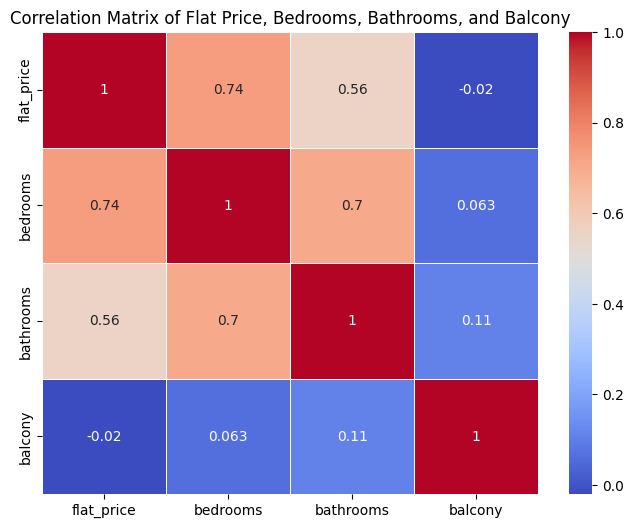


--- Regression Model Summary ---
                            OLS Regression Results                            
Dep. Variable:             flat_price   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     2985.
Date:                Wed, 02 Oct 2024   Prob (F-statistic):               0.00
Time:                        10:43:49   Log-Likelihood:                -14540.
No. Observations:                7373   AIC:                         2.909e+04
Df Residuals:                    7369   BIC:                         2.911e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load the dataset
df = pd.read_csv('/content/cleaned_data_for_model.csv')

# Step 3: Display the first few rows of the dataset to ensure it's loaded correctly
print("First 5 rows of the dataset:")
print(df.head())

# Step 4: Perform basic statistics for numeric variables (mean, median, variance)
print("\n--- Basic Statistics ---")

# Select only numeric columns: 'flat_price', 'bedrooms', 'bathrooms', 'balcony'
numeric_cols = ['flat_price', 'bedrooms', 'bathrooms', 'balcony']

# Mean
print("Mean values:\n", df[numeric_cols].mean())

# Median
print("\nMedian values:\n", df[numeric_cols].median())

# Variance
print("\nVariance values:\n", df[numeric_cols].var())

# Step 5: Correlation Matrix
print("\n--- Correlation Matrix ---")
corr_matrix = df[numeric_cols].corr()

# Display the correlation matrix
print(corr_matrix)

# Step 6: Visualize the Correlation Matrix using Seaborn heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Flat Price, Bedrooms, Bathrooms, and Balcony')
plt.show()

# Step 7: Regression Analysis (Predicting flat_price using bedrooms, bathrooms, and balcony)
import statsmodels.api as sm

# Define the independent variables and the dependent variable
X = df[['bedrooms', 'bathrooms', 'balcony']]  # Independent variables
y = df['flat_price']  # Dependent variable (target variable)

# Adding a constant to the independent variables
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print("\n--- Regression Model Summary ---")
print(model.summary())


In [ ]:
# Step 1: Import necessary libraries for model evaluation
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Load the dataset into a DataFrame
df = pd.read_csv('/content/cleaned_data_for_model.csv')

# Step 2: Split the dataset into training and testing sets (80% train, 20% test)
X = df[['bedrooms', 'bathrooms', 'balcony']]  # Independent variables
y = df['flat_price']  # Dependent variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add constant to independent variables for OLS regression
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Step 3: Fit the OLS model using the training data
model = sm.OLS(y_train, X_train_sm).fit()

# Step 4: Predict flat prices for the test set
y_pred = model.predict(X_test_sm)

# Step 5: Calculate R-squared, Mean Squared Error, and Explained Variance
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
explained_variance = explained_variance_score(y_test, y_pred)

print(f"R-squared: {r_squared}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Explained Variance: {explained_variance}")

# Step 6: Cross-validation to check the model's generalization
# Define the linear regression model
lr_model = LinearRegression()

# Perform 5-fold cross-validation
cv_scores = cross_val_score(lr_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_mse_scores = -cv_scores

print(f"Cross-Validation MSE scores: {cv_mse_scores}")
print(f"Mean MSE from Cross-Validation: {np.mean(cv_mse_scores)}")


R-squared: 0.5521480052622763
Mean Squared Error (MSE): 2.9110054231221167
Root Mean Squared Error (RMSE): 1.7061668802090013
Explained Variance: 0.5522194560594075
Cross-Validation MSE scores: [2.95474574 3.37058757 2.96038806 2.99293294 2.8458174 ]
Mean MSE from Cross-Validation: 3.02489434185514
